In [ ]:
# load data

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel("data.xlsx")
df.head()

,Field,State,Avg TDS,"Temp, °C",pH,SiO2,Ca,Na,K,HCO3,SO4,Cl
0,Beowawe,Nevada,1101.3900,213.0,7.7700,304.00,15.960000,228.000000,23.666667,329.198699,94.750000,46.500000
1,Blue Mountain,Nevada,4274.2610,230.0,8.5035,291.20,35.360000,1411.200000,172.600000,206.500000,160.200000,2246.000000
2,Brady Hot Spring,Nevada,2131.2036,190.0,7.9100,101.00,45.428571,755.000000,40.600000,98.857143,154.571429,1040.000000
3,Desert Peak,Nevada,9076.3208,207.0,8.2700,315.60,164.200000,2908.000000,301.800000,40.400000,127.800000,5096.000000
4,Dixie Valley,Nevada,2155.0370,285.0,9.1700,609.71,7.471429,465.714286,70.857143,178.285714,191.714286,503.428571


# Correlation Matrix of Selected Columns

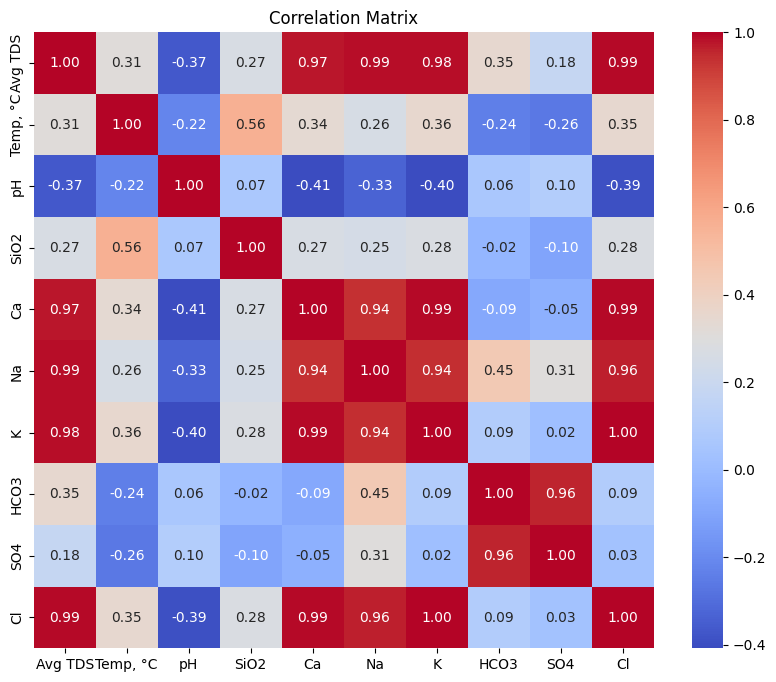

In [ ]:
#seaborn correlation matrix excluding columns titled Field, and State,

import matplotlib.pyplot as plt
import seaborn as sns
# Calculate the correlation matrix, excluding specified columns
correlation_matrix = df.drop(['Field', 'State'], axis=1).corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 8))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
#plt.title('Correlation Matrix (Excluding Field and State)')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
#correlation matrix values numerical columns in a table form and save to excel

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame
# Calculate the correlation matrix for numerical columns
correlation_matrix = df.select_dtypes(include=['number']).corr()

# Save the correlation matrix to an Excel file
correlation_matrix.to_excel("correlation_matrix.xlsx", index=True)


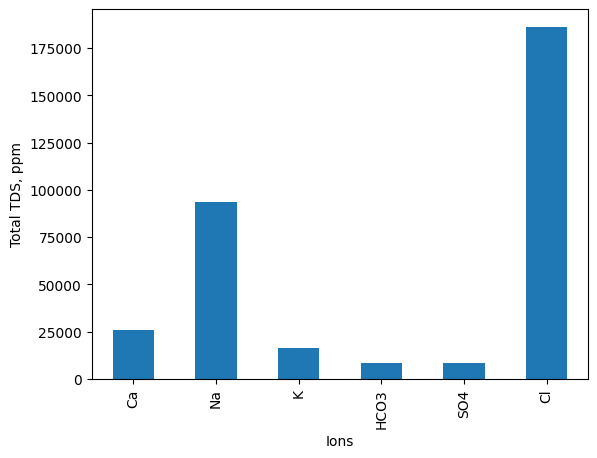

In [ ]:
# bar chart distribution for ions in columns 7 to 12

import matplotlib.pyplot as plt
df.iloc[:, 6:12].sum().plot.bar()
plt.xlabel("Ions")
plt.ylabel("Total TDS, ppm")
plt.show()


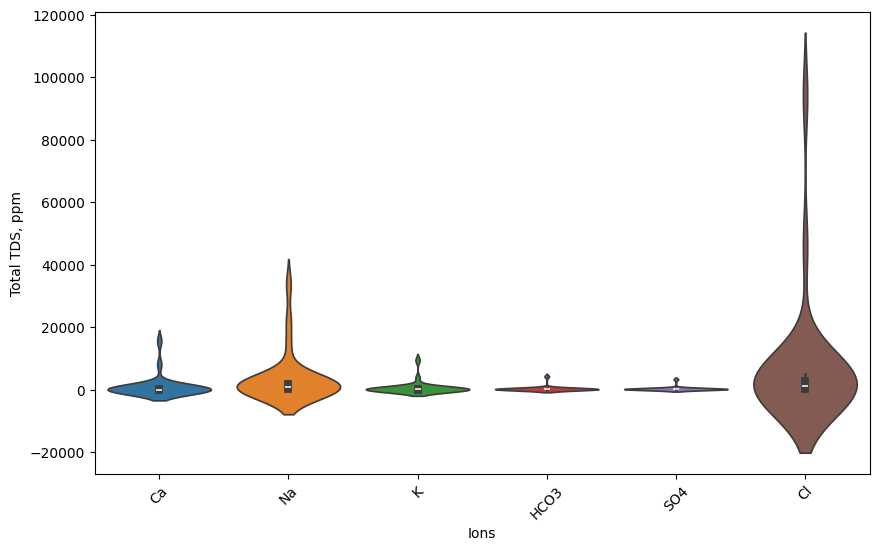

In [ ]:
# violin plots distribution for ions in columns 8 to 13

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.violinplot(data=df.iloc[:, 6:12])
plt.xticks(rotation=45)
plt.xlabel("Ions")
plt.ylabel("Total TDS, ppm")
plt.show()


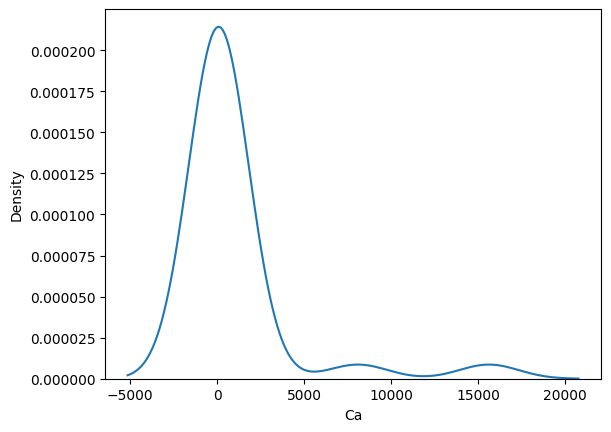

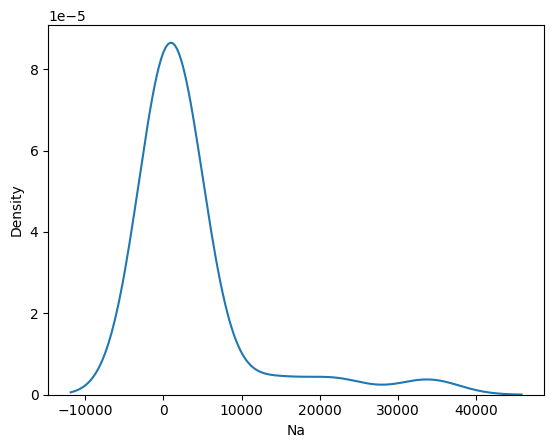

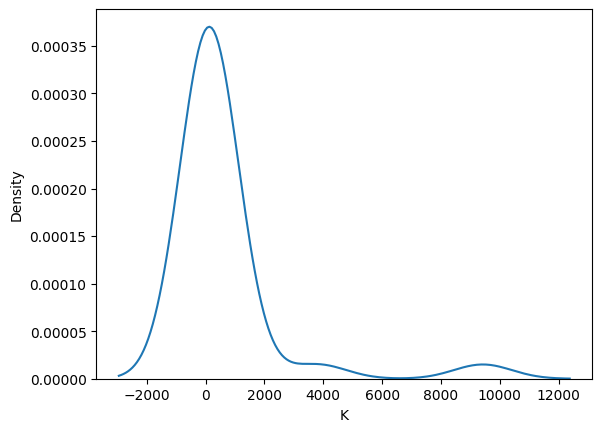

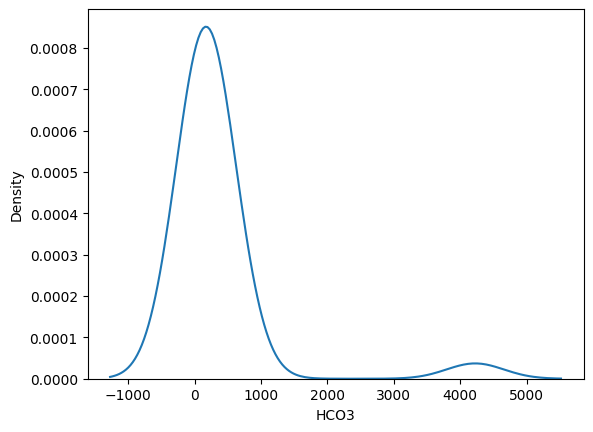

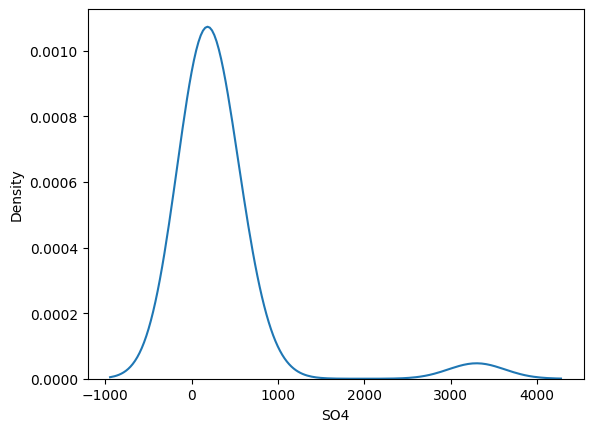

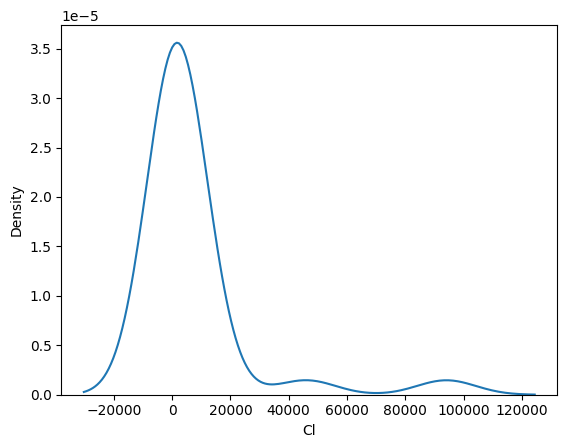

In [ ]:

# 2. Kernel Density Estimation (KDE) plots for each ion
for i in range(6, 12):
  plt.figure()
  sns.kdeplot(df.iloc[:, i])
  plt.xlabel(df.columns[i])
  plt.ylabel("Density")
 # plt.title(f"Distribution of {df.columns[i]}")
  plt.show()


#2 Salinity distribution and correlation with temp

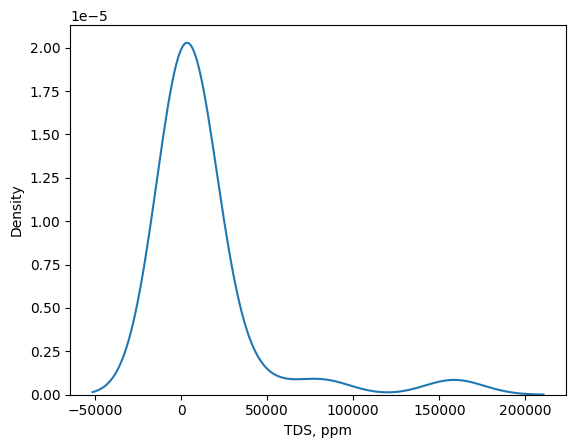

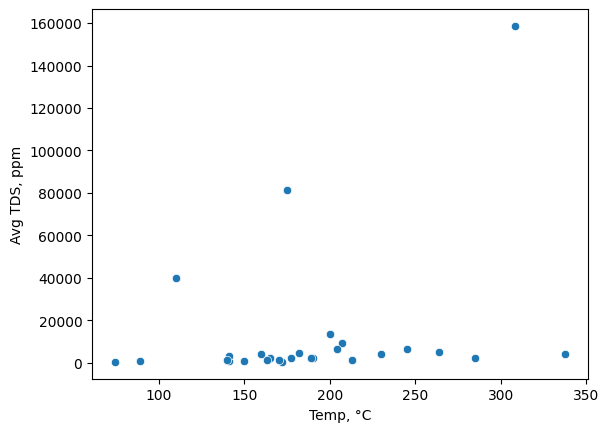

Correlation between Temperature and Salinity: 0.3078352225957744


In [ ]:
# Salinity distribution and correlation with temp

import matplotlib.pyplot as plt
# Salinity distribution
plt.figure()
sns.kdeplot(df["Avg TDS"])
plt.xlabel("TDS, ppm")
plt.ylabel("Density")
#plt.title("Salinity Distribution")
plt.show()

# Correlation with temperature
plt.figure()
sns.scatterplot(x="Temp, °C", y="Avg TDS", data=df)
plt.xlabel("Temp, °C")
plt.ylabel("Avg TDS, ppm")
#plt.title("Salinity vs. Temperature")
plt.show()

# Calculate correlation coefficient
correlation = df["Temp, °C"].corr(df["Avg TDS"])
print(f"Correlation between Temperature and Salinity: {correlation}")


#3 Salinity vs State

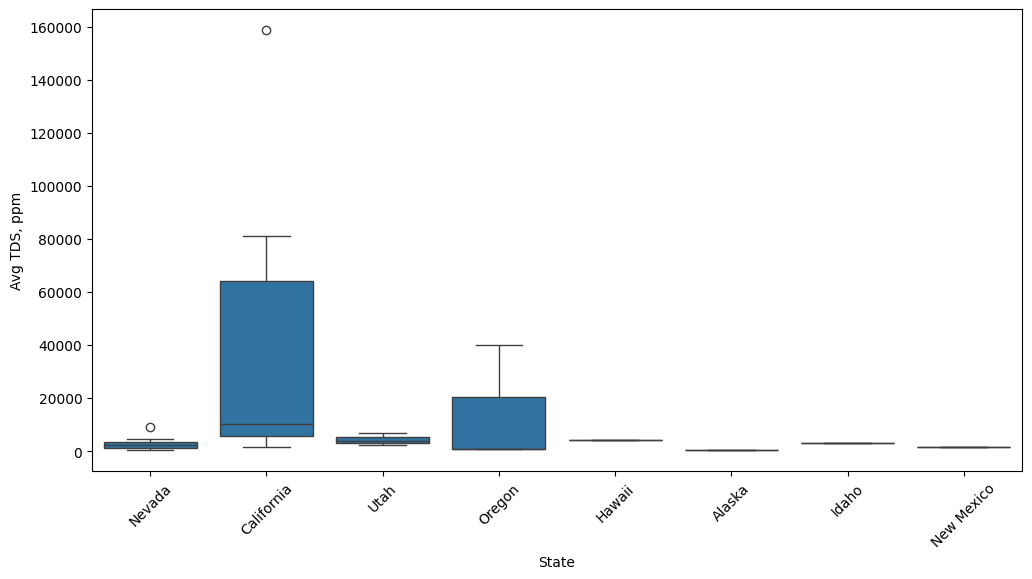

In [ ]:
# distribution of salinity (Avg TDS) by state

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
sns.boxplot(x="State", y="Avg TDS", data=df)
plt.xticks(rotation=45)
plt.xlabel("State")
plt.ylabel("Avg TDS, ppm")
#plt.title("Distribution of Salinity by State")
plt.show()


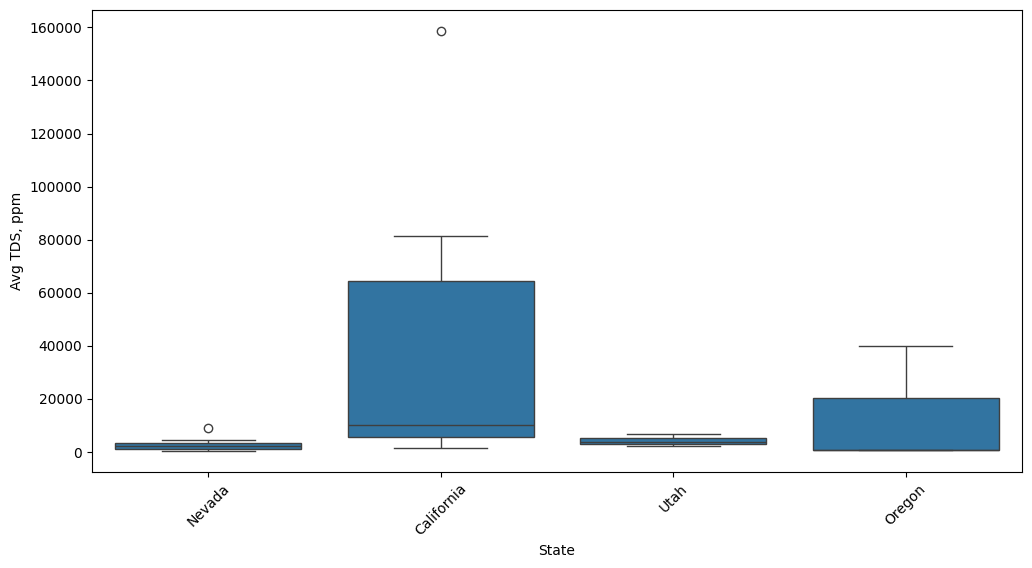

In [ ]:
# distribution of salinity (Avg TDS) by state excluding Hawaii, Alaska, Idaho, and New Mexico

import matplotlib.pyplot as plt
# Filter data to exclude specified states
excluded_states = ["Hawaii", "Alaska", "Idaho", "New Mexico"]
filtered_df = df[~df["State"].isin(excluded_states)]

# Plot distribution of salinity by state for filtered data
plt.figure(figsize=(12, 6))
sns.boxplot(x="State", y="Avg TDS", data=filtered_df)
plt.xticks(rotation=45)
plt.xlabel("State")
plt.ylabel("Avg TDS, ppm")
#plt.title("Distribution of Salinity by State (Excluding HI, AK, ID, NM)")
plt.show()


# Temp vs State

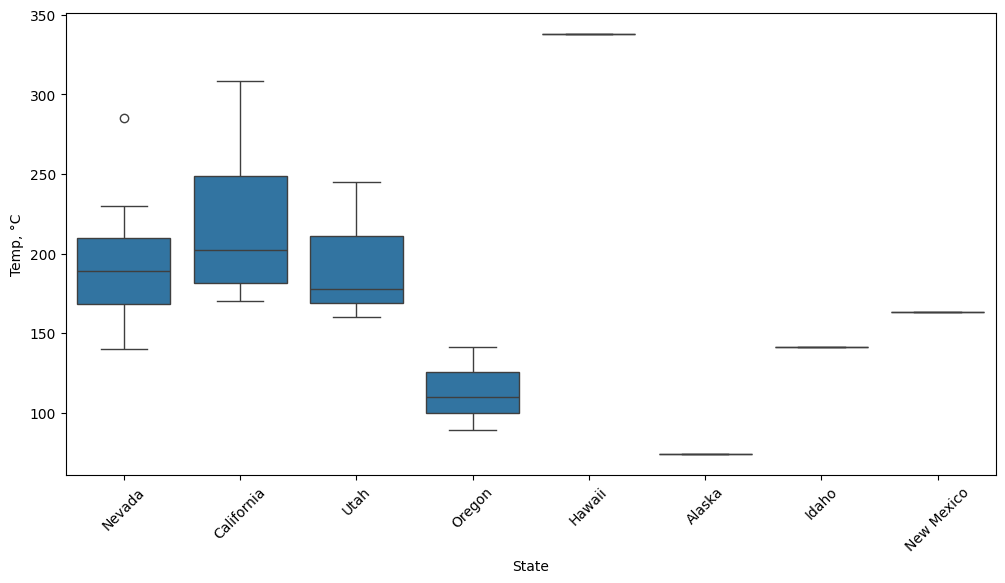

In [ ]:
# distribution of temp by state

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
sns.boxplot(x="State", y="Temp, °C", data=df)
plt.xticks(rotation=45)
plt.xlabel("State")
plt.ylabel("Temp, °C")
#plt.title("Distribution of Temperature by State")
plt.show()


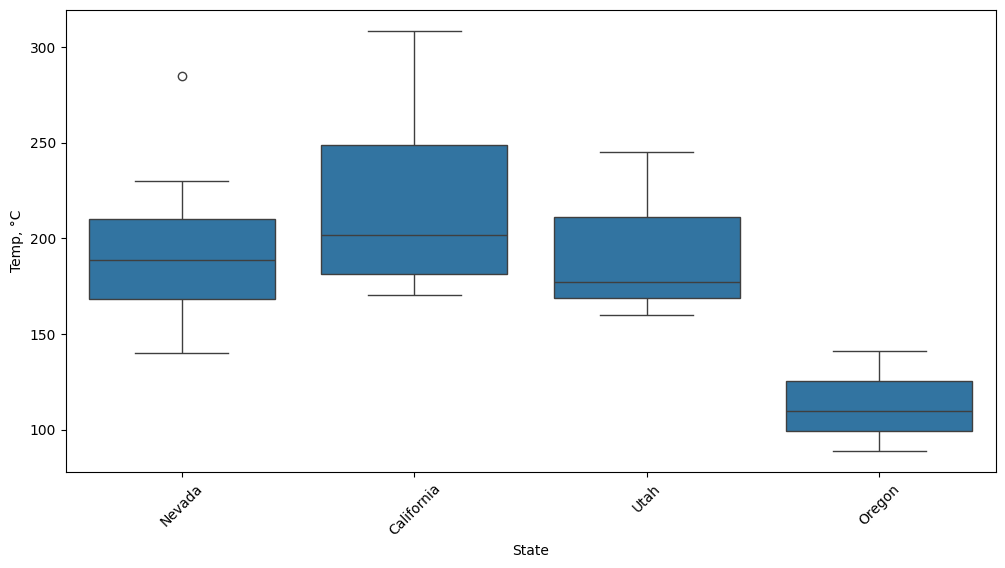

In [ ]:
# distribution of temp by state excluding Hawaii, Alaska, Idaho, and New Mexico

import matplotlib.pyplot as plt
# Filter data to exclude specified states
excluded_states = ["Hawaii", "Alaska", "Idaho", "New Mexico"]
filtered_df = df[~df["State"].isin(excluded_states)]

# Plot distribution of temperature by state for filtered data
plt.figure(figsize=(12, 6))
sns.boxplot(x="State", y="Temp, °C", data=filtered_df)
plt.xticks(rotation=45)
plt.xlabel("State")
plt.ylabel("Temp, °C")
#plt.title("Distribution of Temperature by State (Excluding HI, AK, ID, NM)")
plt.show()


# Correlations

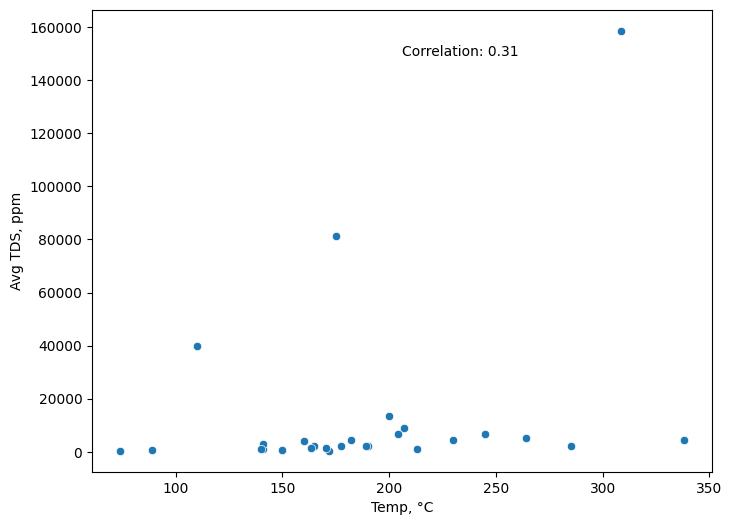

In [ ]:
# correlation plot of Avg TDS against Temp

import matplotlib.pyplot as plt
# Correlation plot of Avg TDS against Temp
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Temp, °C", y="Avg TDS", data=df)
plt.xlabel("Temp, °C")
plt.ylabel("Avg TDS, ppm")
#plt.title("Correlation between Salinity and Temperature")

# Calculate and display correlation coefficient
correlation = df["Temp, °C"].corr(df["Avg TDS"])
plt.text(0.5, 0.9, f"Correlation: {correlation:.2f}", transform=plt.gca().transAxes)

plt.show()


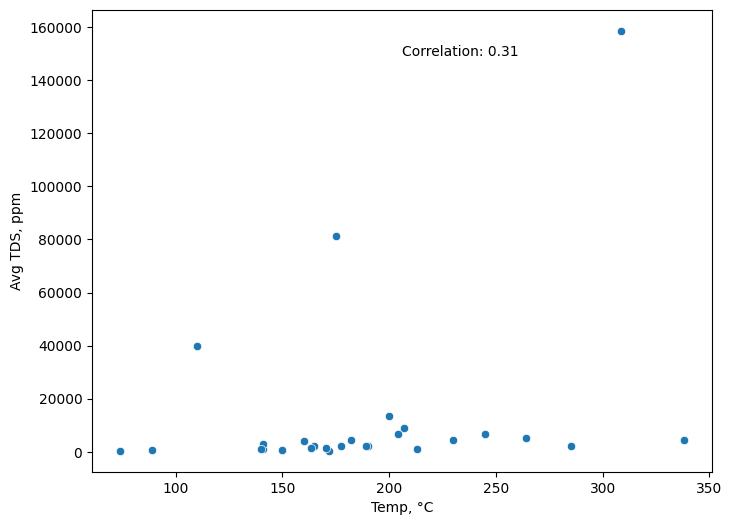

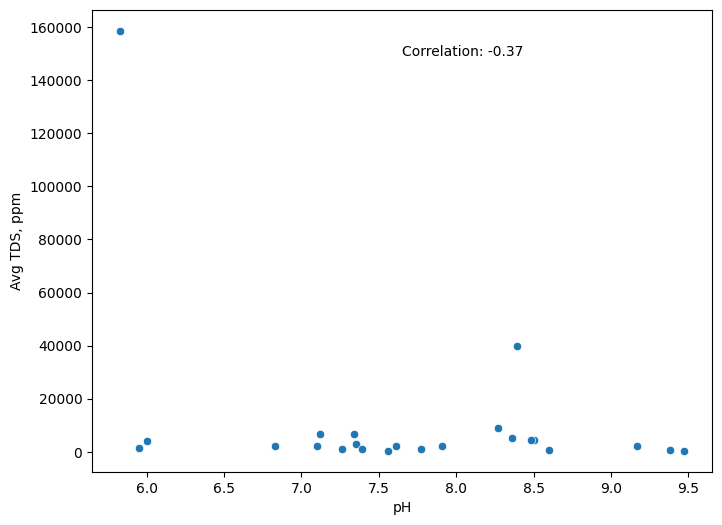

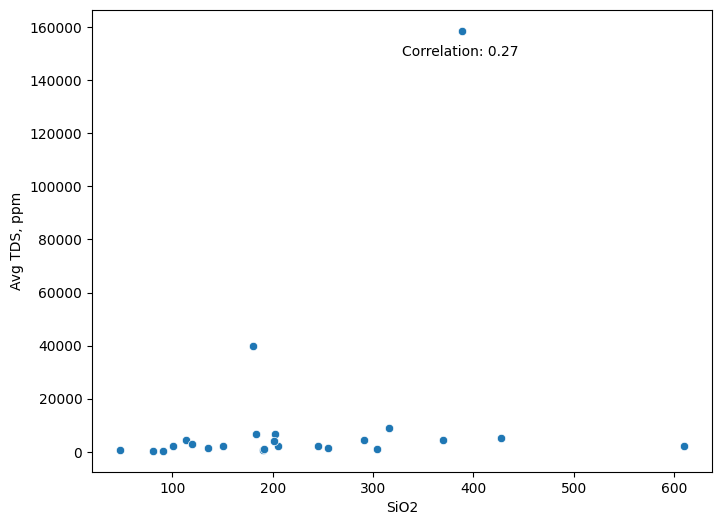

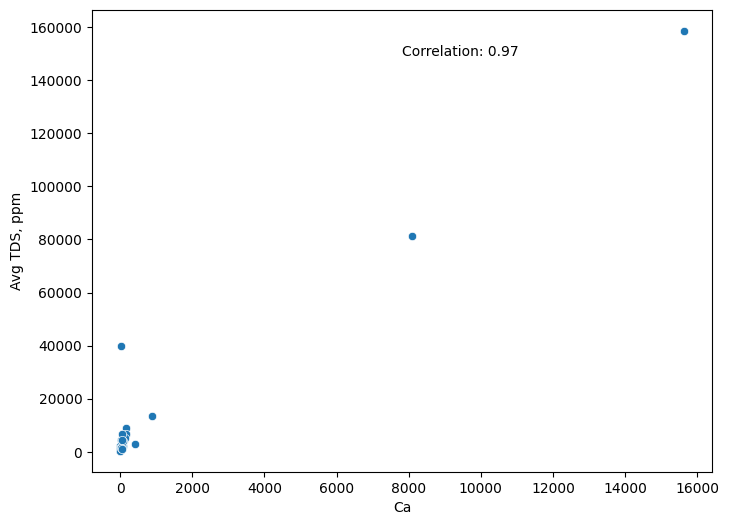

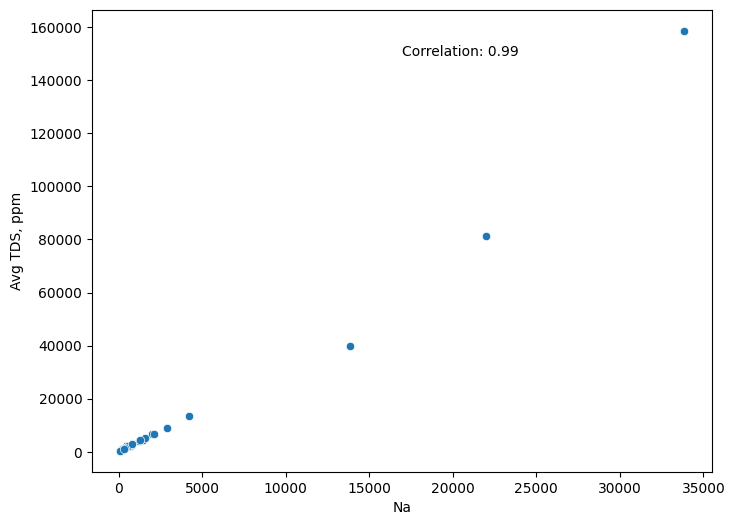

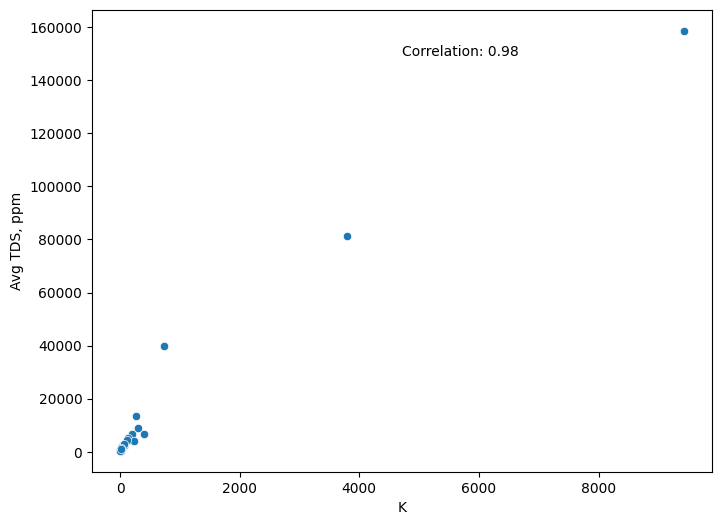

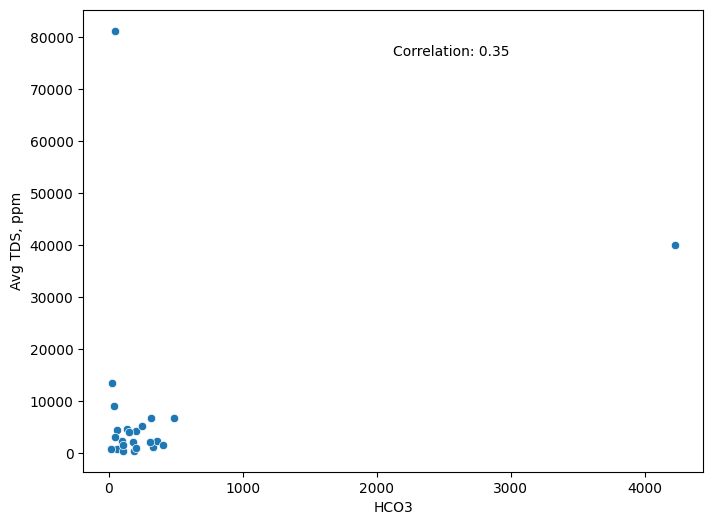

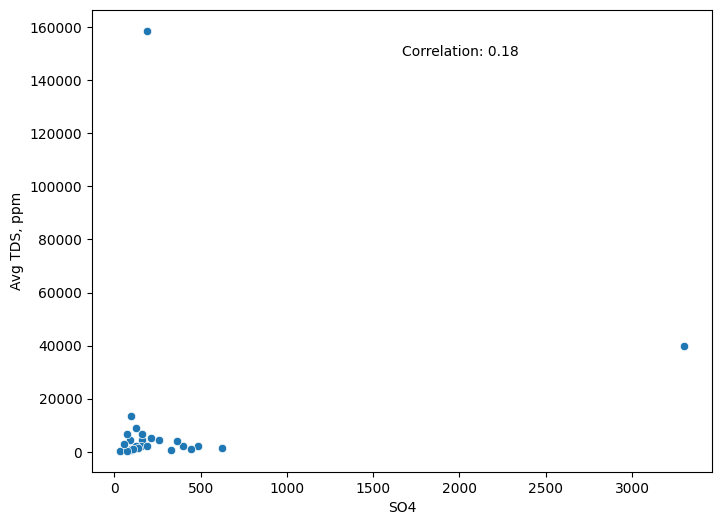

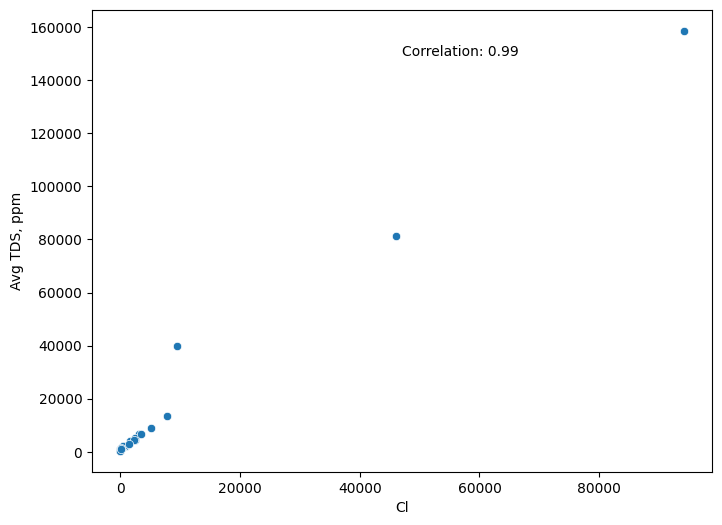

In [ ]:
# correlation plot of Avg TDS vs Temp, TDS vs pH, TDS vs SiO2, TDS vs Ca, Na, K, HCO3, SO4, Cl

import matplotlib.pyplot as plt
# Correlations

# List of ions to plot against Avg TDS
ions = ["Temp, °C", "pH", "SiO2", "Ca", "Na", "K", "HCO3", "SO4", "Cl"]

# Create scatter plots for each ion
for ion in ions:
  plt.figure(figsize=(8, 6))
  sns.scatterplot(x=ion, y="Avg TDS", data=df)
  plt.xlabel(ion)
  plt.ylabel("Avg TDS, ppm")
  #plt.title(f"Correlation between Salinity and {ion}")

  # Calculate and display correlation coefficient
  correlation = df[ion].corr(df["Avg TDS"])
  plt.text(0.5, 0.9, f"Correlation: {correlation:.2f}", transform=plt.gca().transAxes)

  plt.show()



# Image Correlation of Above

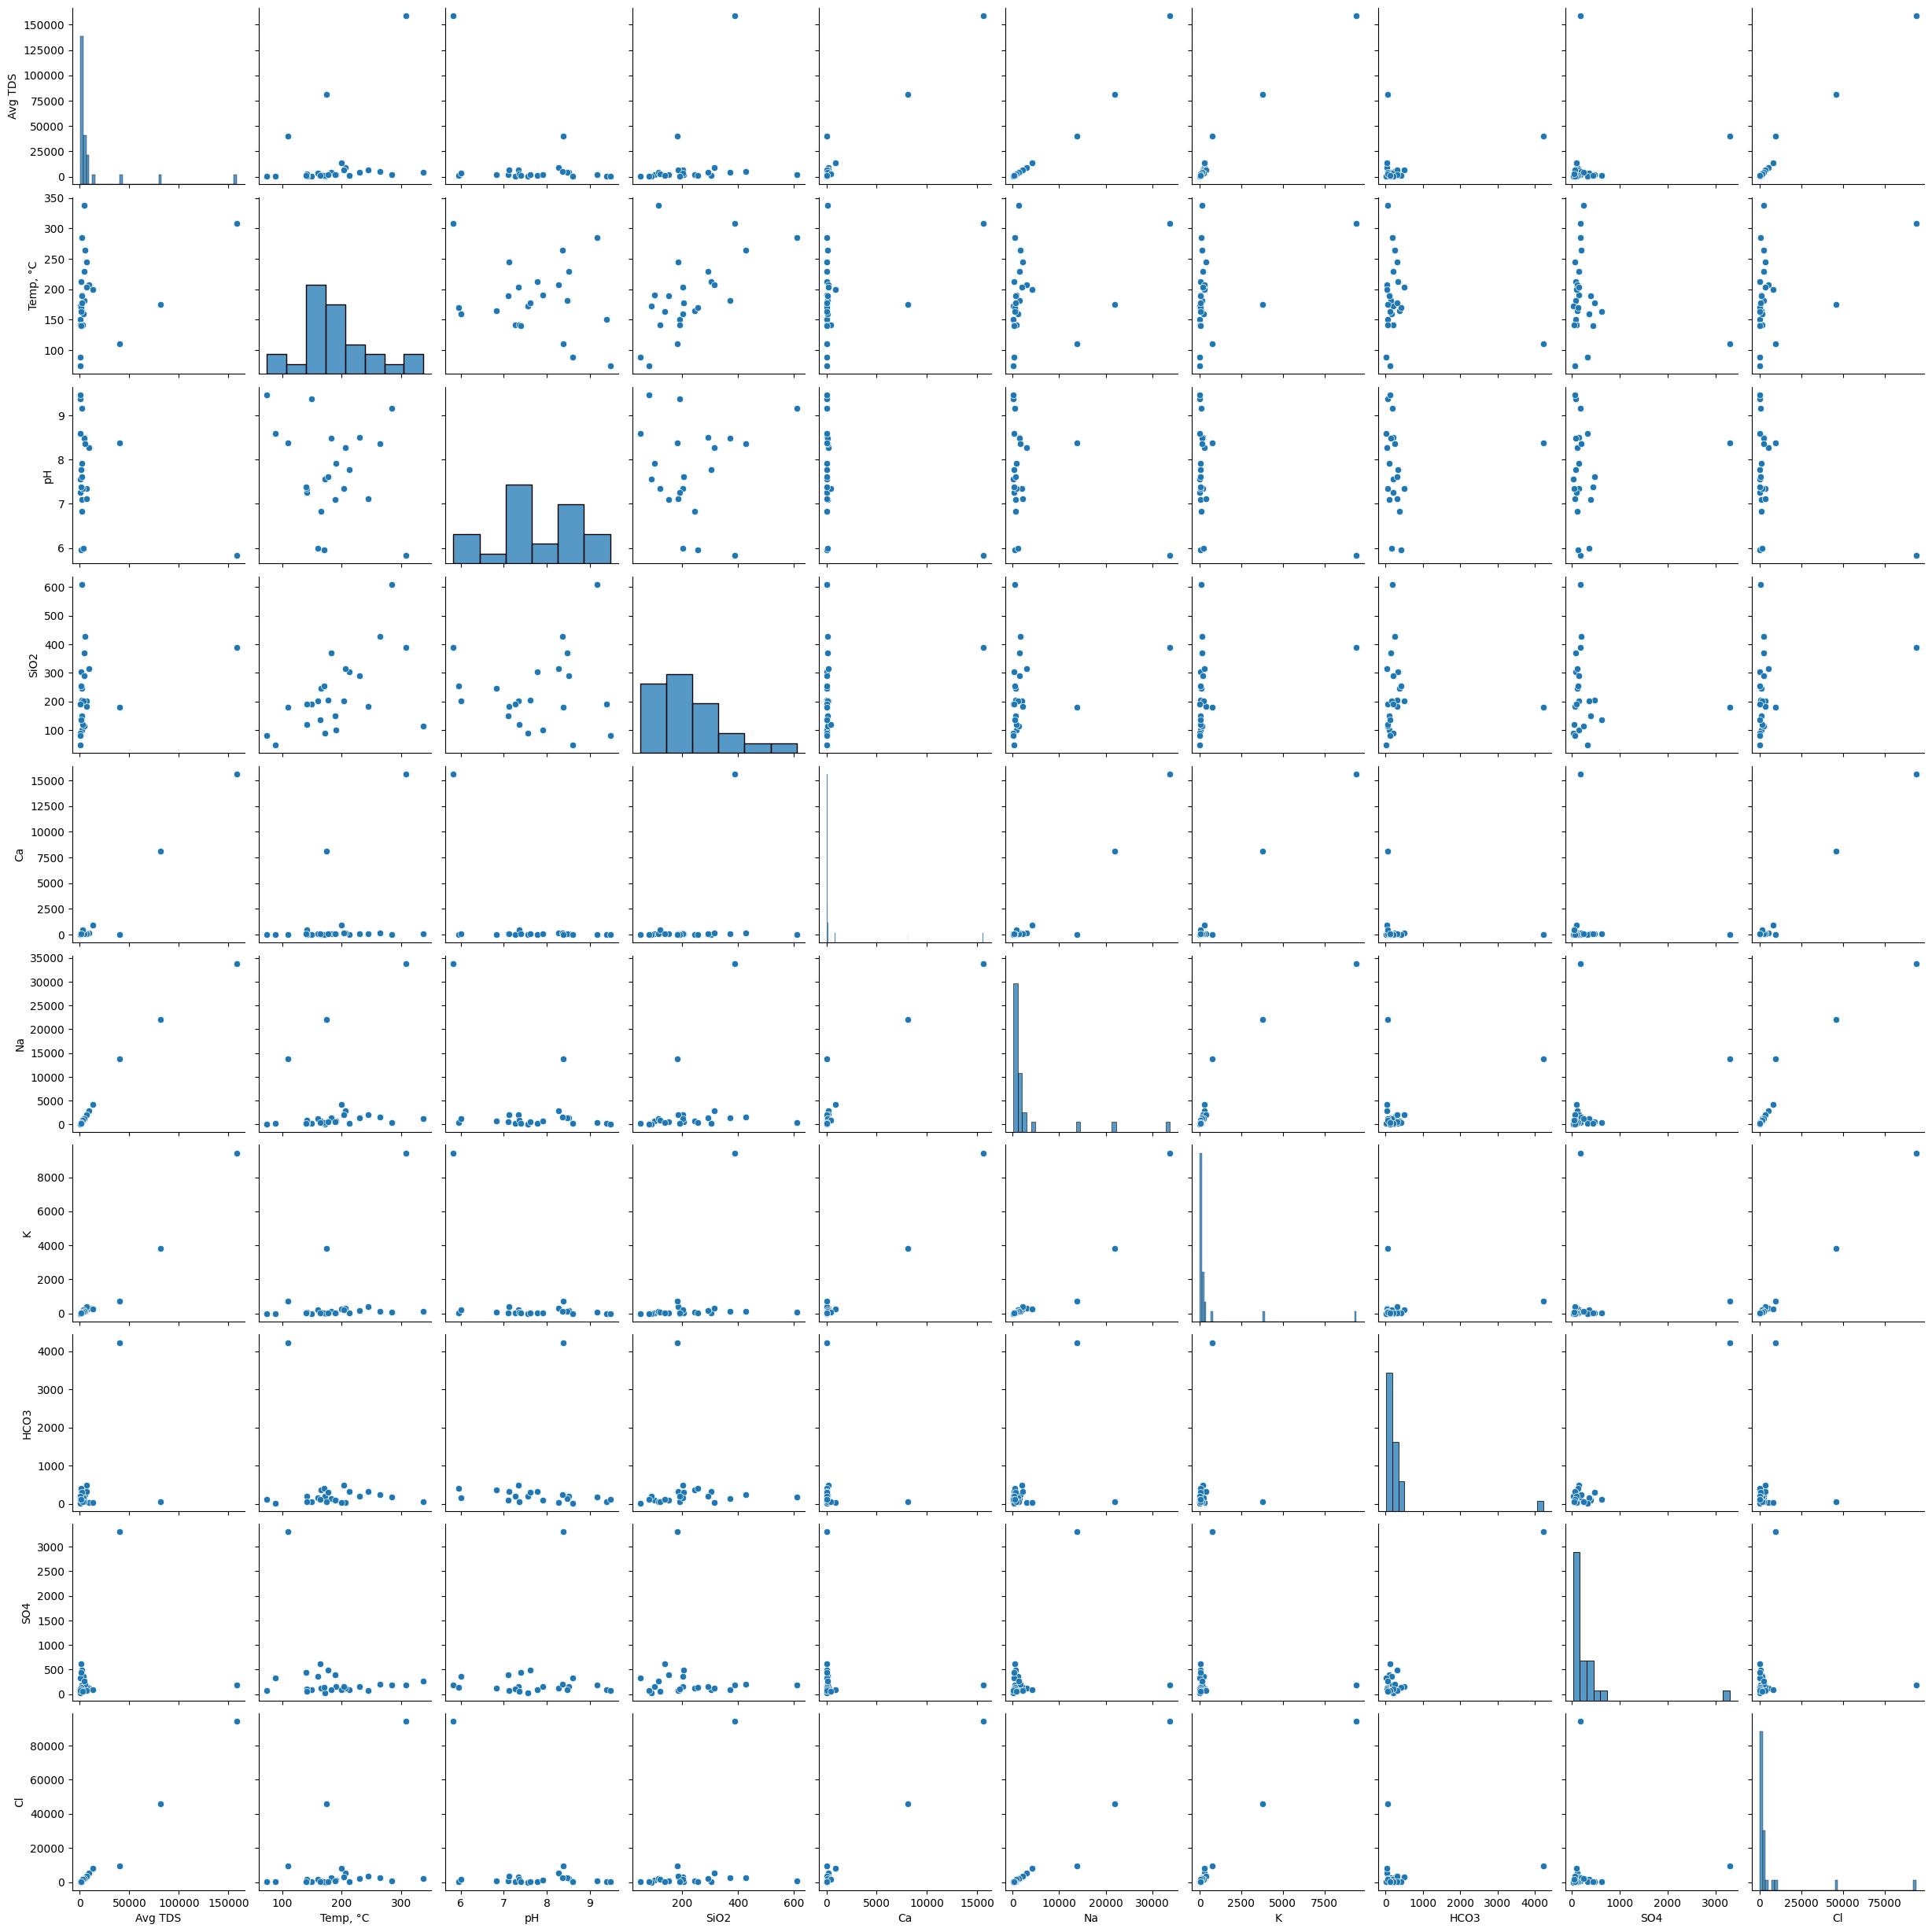

In [ ]:
# Matrix plot of Avg TDS vs Temp, TDS vs pH, TDS vs SiO2, TDS vs Ca, Na, K, HCO3, SO4, Cl

import matplotlib.pyplot as plt
# Select columns for the matrix plot
columns_to_plot = ["Avg TDS", "Temp, °C", "pH", "SiO2", "Ca", "Na", "K", "HCO3", "SO4", "Cl"]

# Create a pairplot (matrix plot)
sns.pairplot(df[columns_to_plot])
#plt.suptitle("Matrix Plot of Salinity and Other Variables", y=1.02)
plt.show()


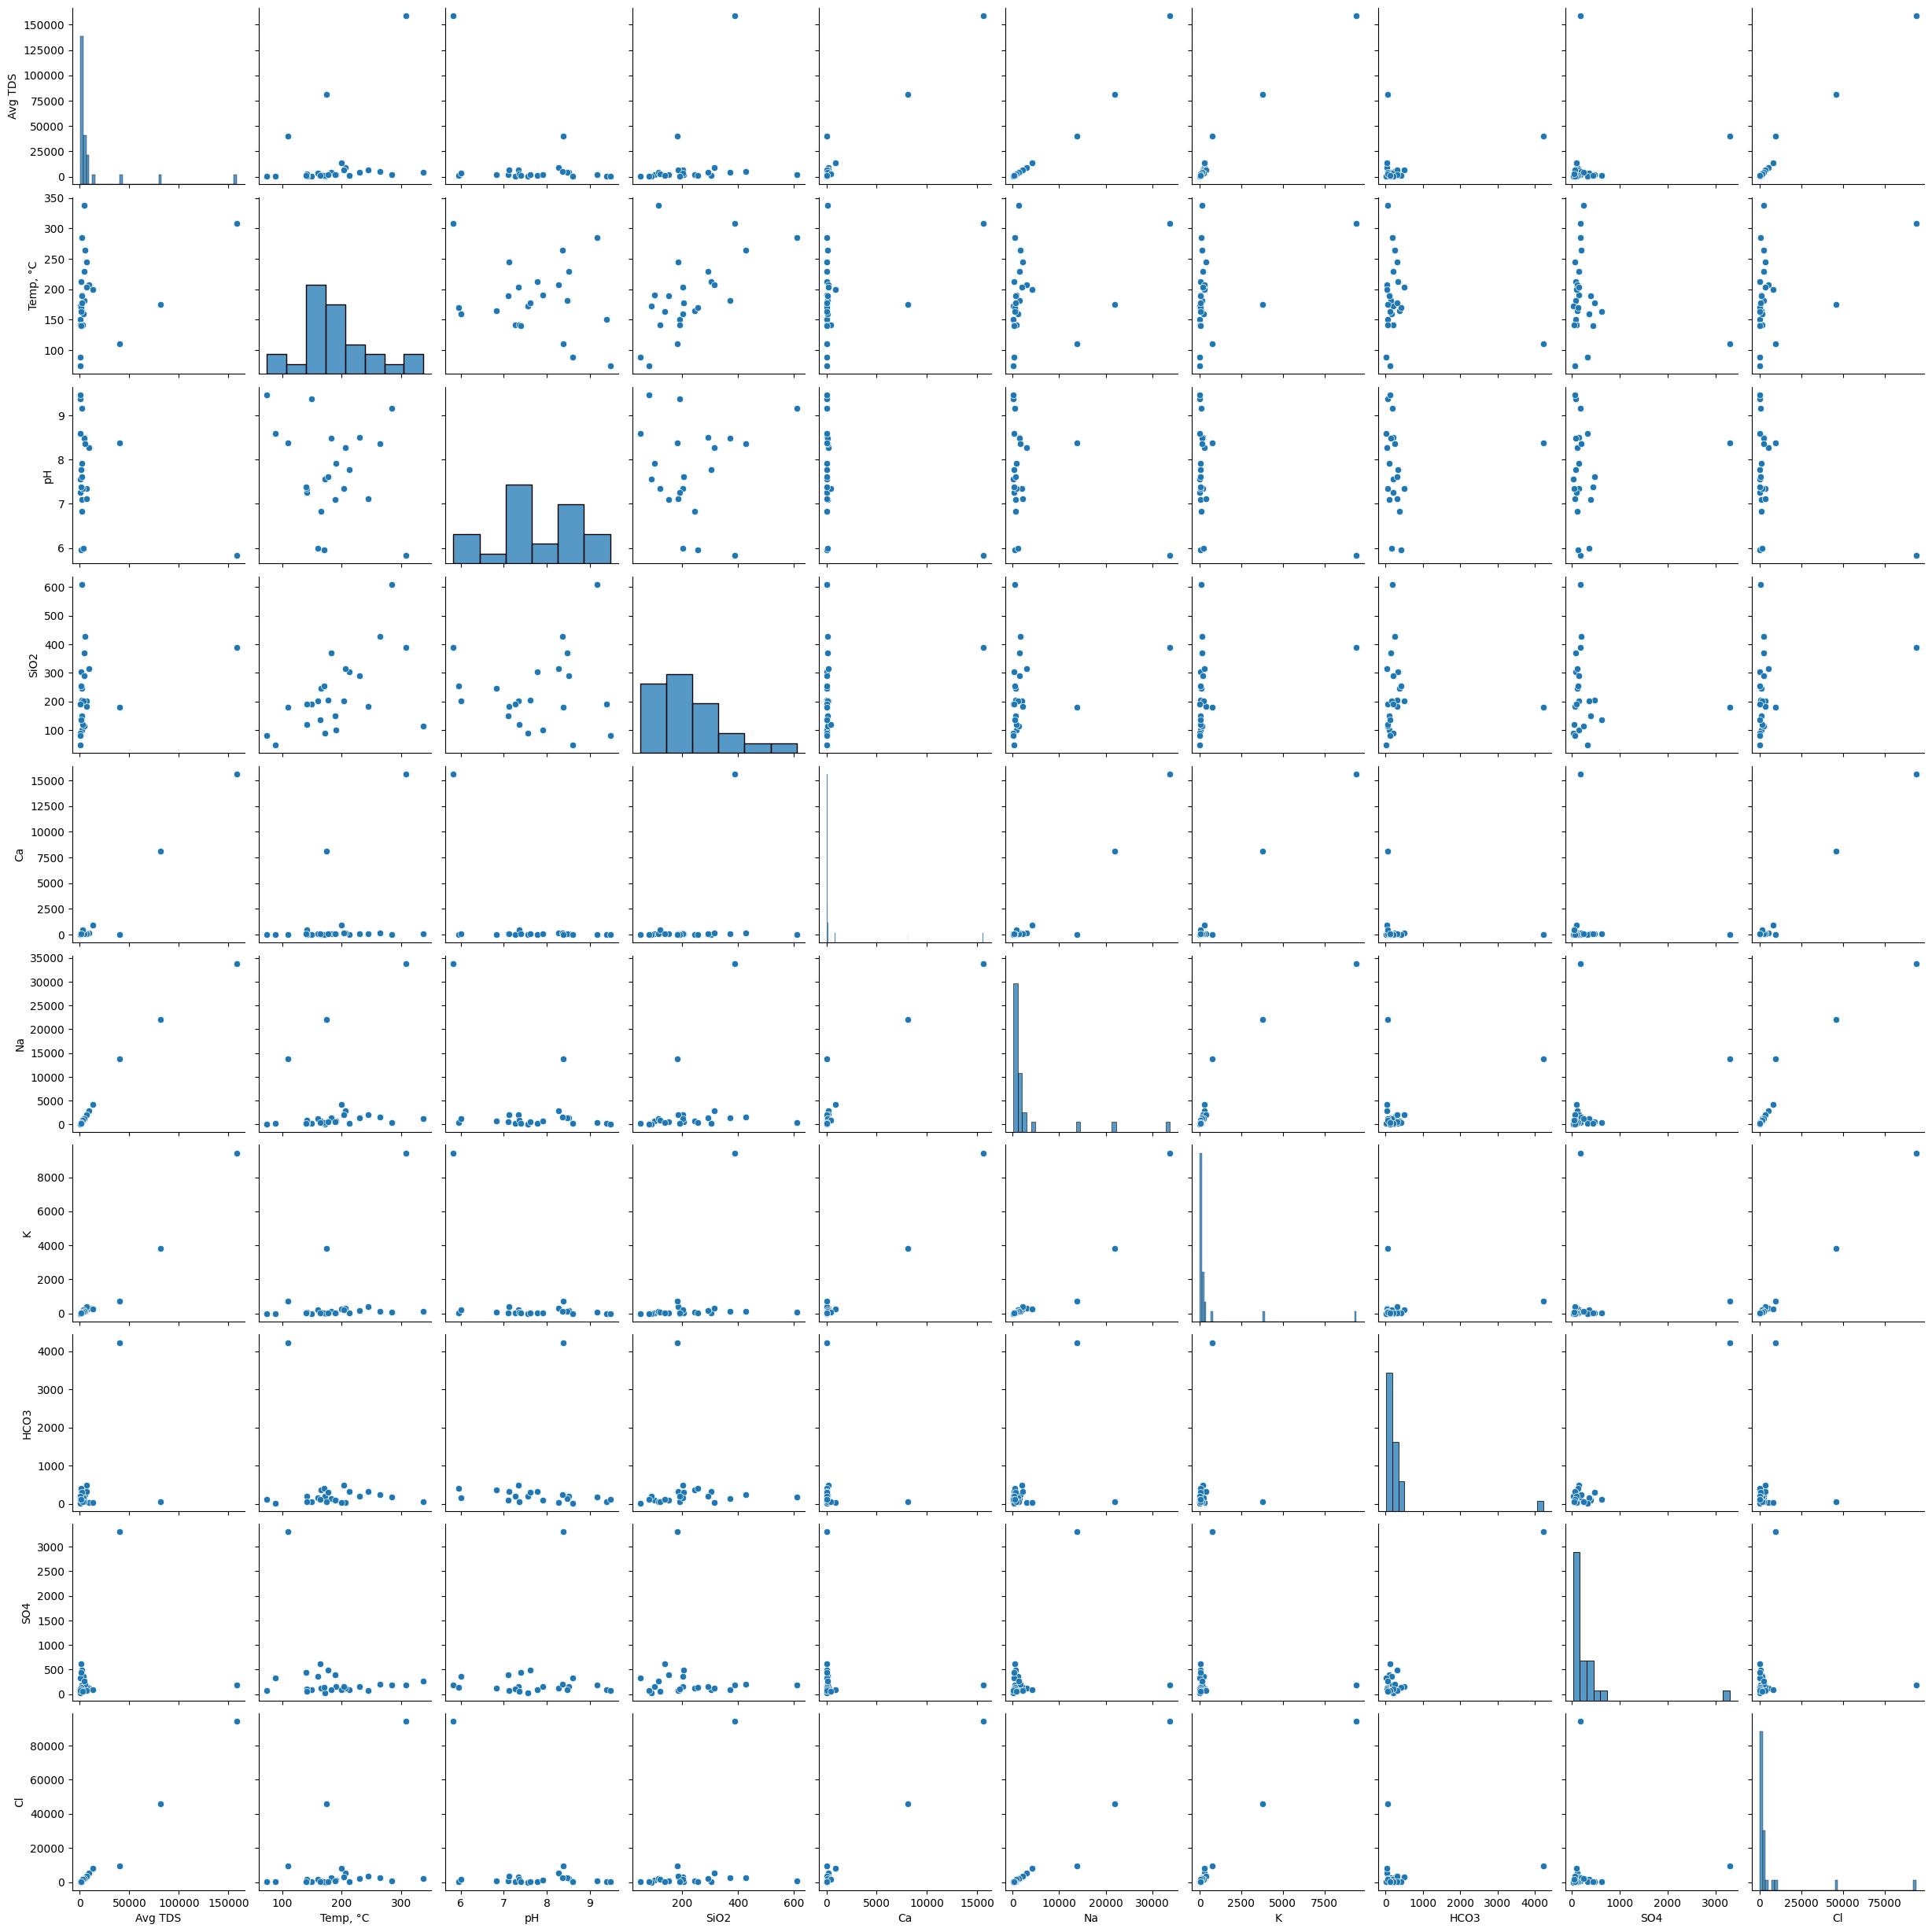

In [ ]:
# plot variable Matrix of Avg TDS vs Temp, TDS vs pH, TDS vs SiO2, TDS vs Ca, Na, K, HCO3, SO4, Cl

import matplotlib.pyplot as plt
# Select columns for the matrix plot
columns_to_plot = ["Avg TDS", "Temp, °C", "pH", "SiO2", "Ca", "Na", "K", "HCO3", "SO4", "Cl"]

# Create a pairplot (matrix plot)
sns.pairplot(df[columns_to_plot])
#plt.suptitle("Matrix Plot of Salinity and Other Variables", y=1.02)
plt.show()


# Correlation of Temp

```
# This is formatted as code
```



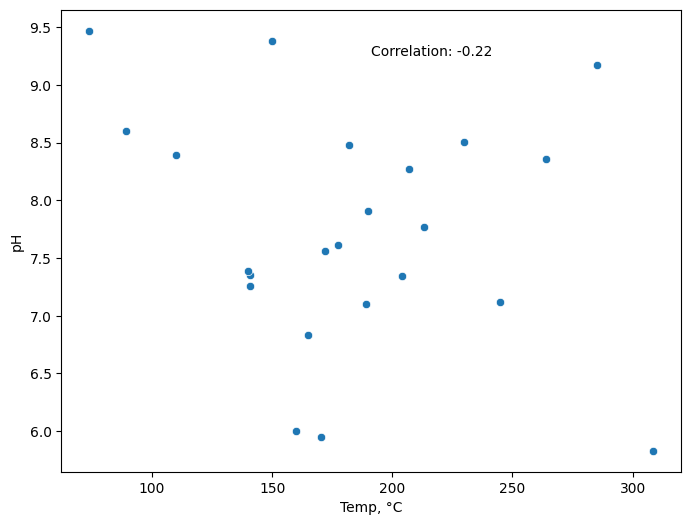

In [ ]:
# correlation plot of ph vs temp

import matplotlib.pyplot as plt
# Correlation plot of pH against Temp
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Temp, °C", y="pH", data=df)
plt.xlabel("Temp, °C")
plt.ylabel("pH")
#plt.title("Correlation between pH and Temperature")

# Calculate and display correlation coefficient
correlation = df["Temp, °C"].corr(df["pH"])
plt.text(0.5, 0.9, f"Correlation: {correlation:.2f}", transform=plt.gca().transAxes)

plt.show()


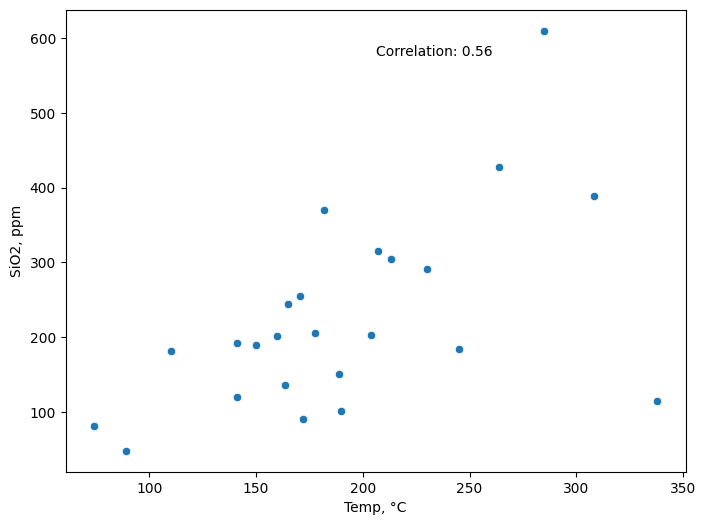

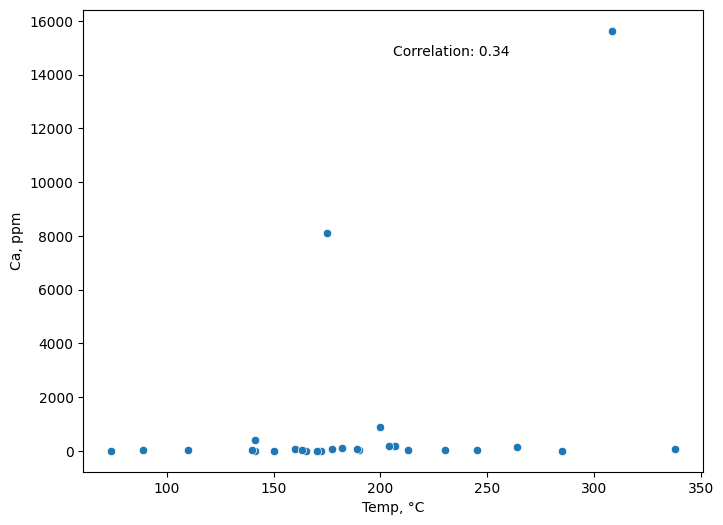

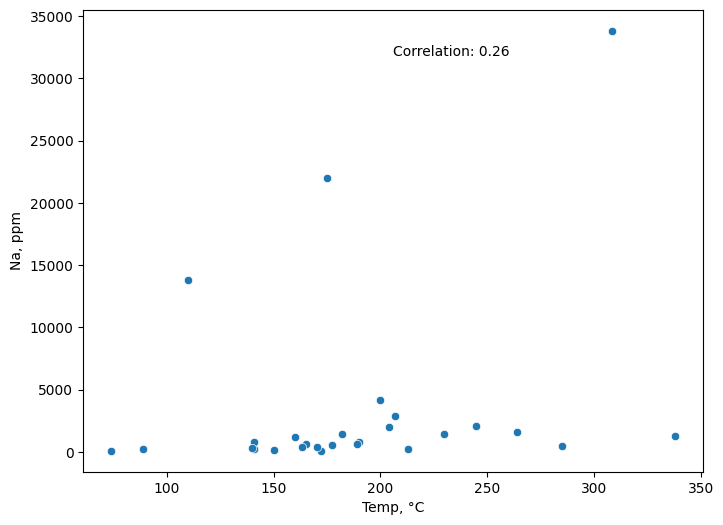

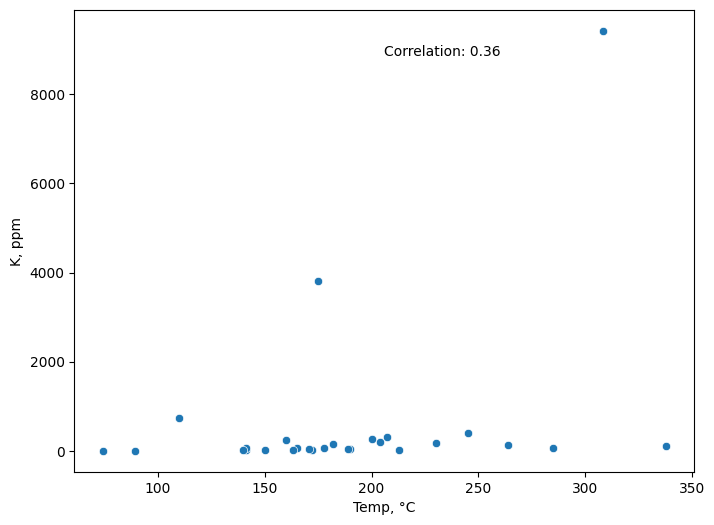

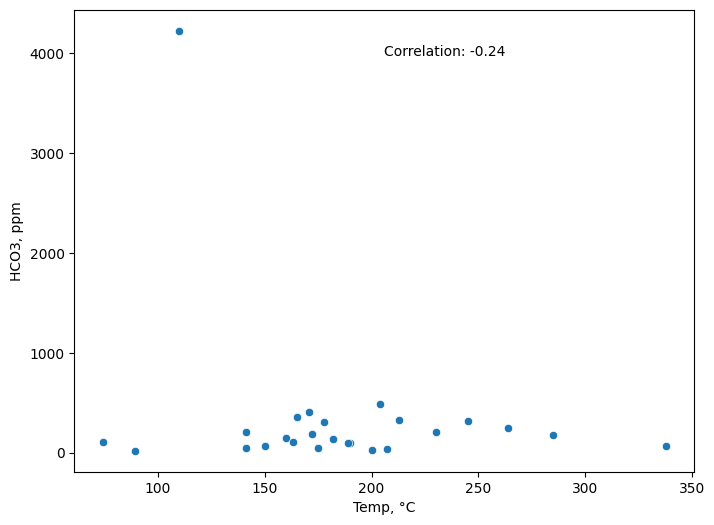

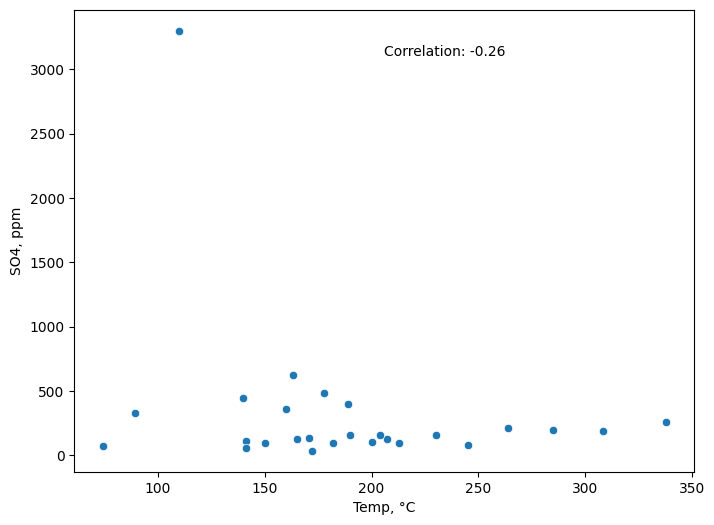

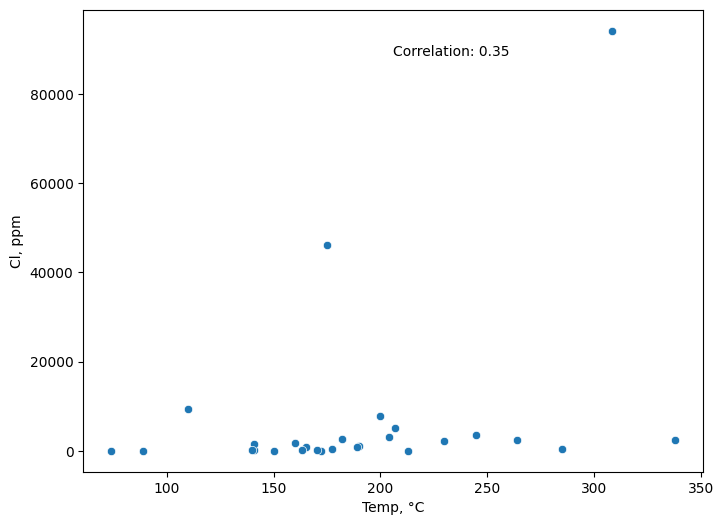

In [ ]:
# correlation plot of Avg Temp vs pH, Temp vs SiO2, Temp vs Ca, Na, K, HCO3, SO4, Cl

import matplotlib.pyplot as plt
# Correlations of Temp with other ions

# List of ions to plot against Temp
ions = ["SiO2", "Ca", "Na", "K", "HCO3", "SO4", "Cl"]

# Create scatter plots for each ion
for ion in ions:
  plt.figure(figsize=(8, 6))
  sns.scatterplot(x="Temp, °C", y=ion, data=df)
  plt.xlabel("Temp, °C")
  plt.ylabel(ion +", ppm")
  #plt.title(f"Correlation between Temperature and {ion}")

  # Calculate and display correlation coefficient
  correlation = df["Temp, °C"].corr(df[ion])
  plt.text(0.5, 0.9, f"Correlation: {correlation:.2f}", transform=plt.gca().transAxes)

  plt.show()


# Correlation of pH

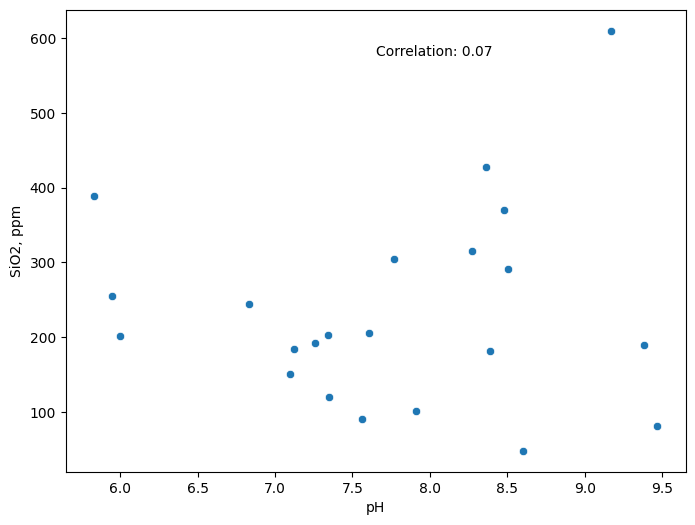

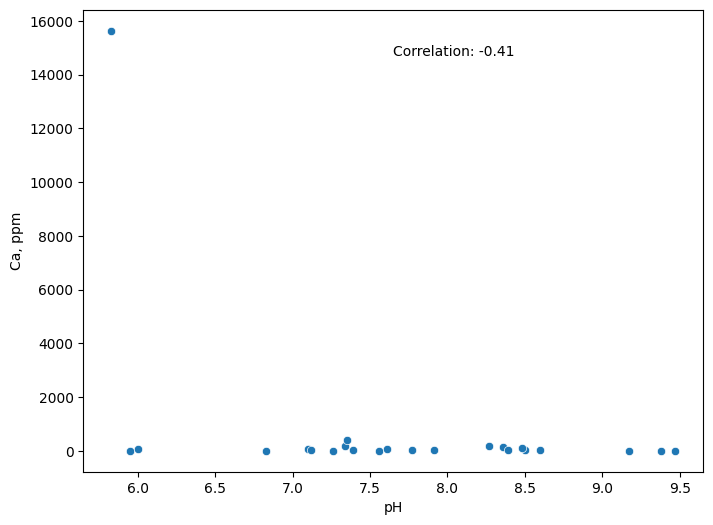

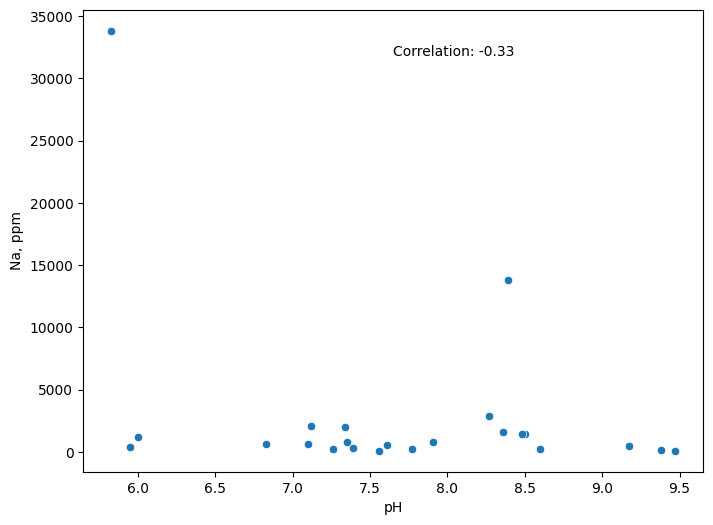

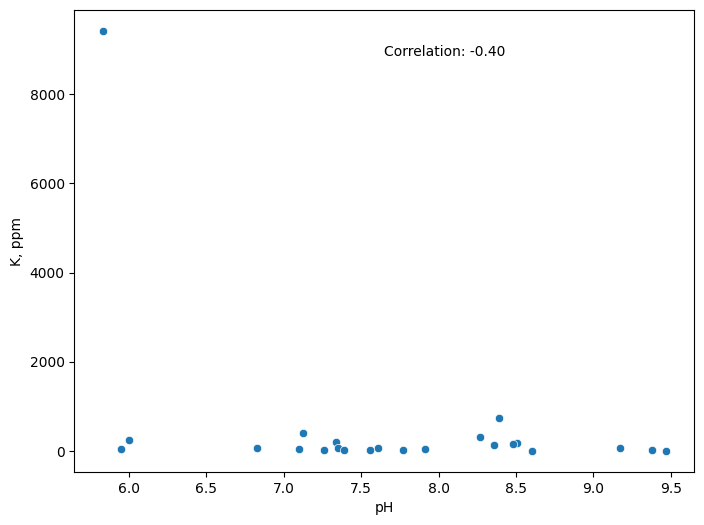

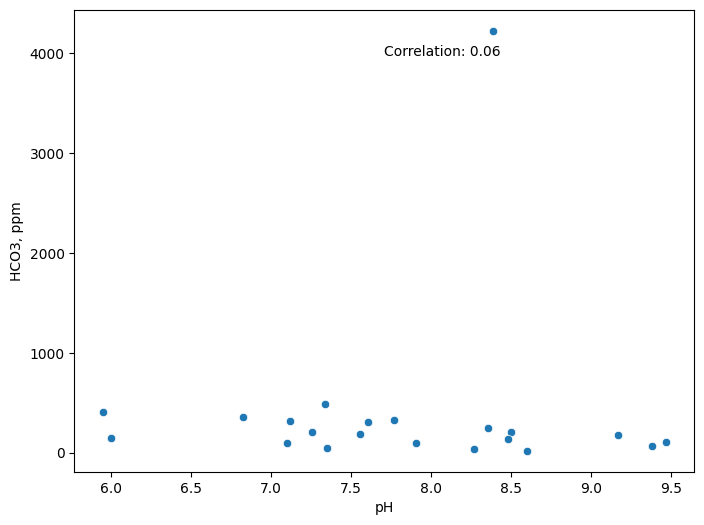

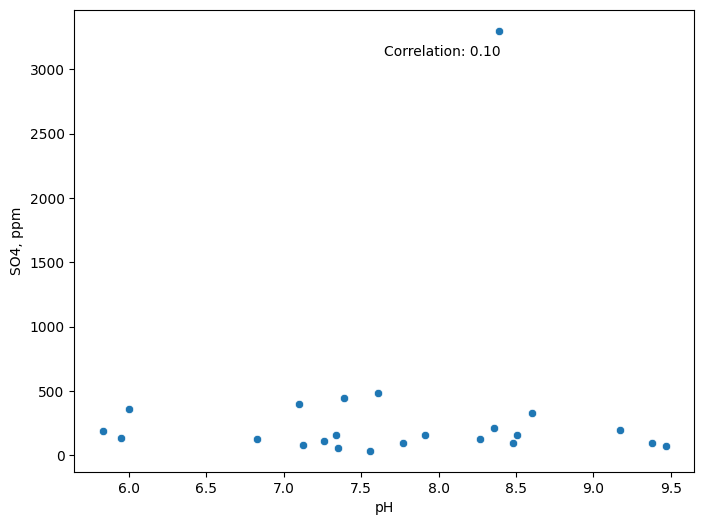

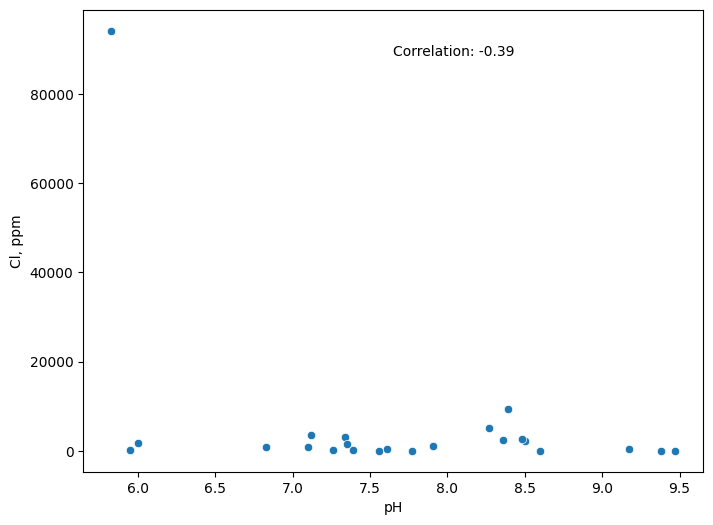

In [ ]:
# correlation plot of pH vs SiO2, pH vs Ca, Na, K, HCO3, SO4, Cl

import matplotlib.pyplot as plt
# Correlations of pH with other ions

# List of ions to plot against pH
ions = ["SiO2", "Ca", "Na", "K", "HCO3", "SO4", "Cl"]

# Create scatter plots for each ion
for ion in ions:
  plt.figure(figsize=(8, 6))
  sns.scatterplot(x="pH", y=ion, data=df)
  plt.xlabel("pH")
  plt.ylabel(ion +", ppm")
  #plt.title(f"Correlation between pH and {ion}")

  # Calculate and display correlation coefficient
  correlation = df["pH"].corr(df[ion])
  plt.text(0.5, 0.9, f"Correlation: {correlation:.2f}", transform=plt.gca().transAxes)

  plt.show()




# 27 reservoirs

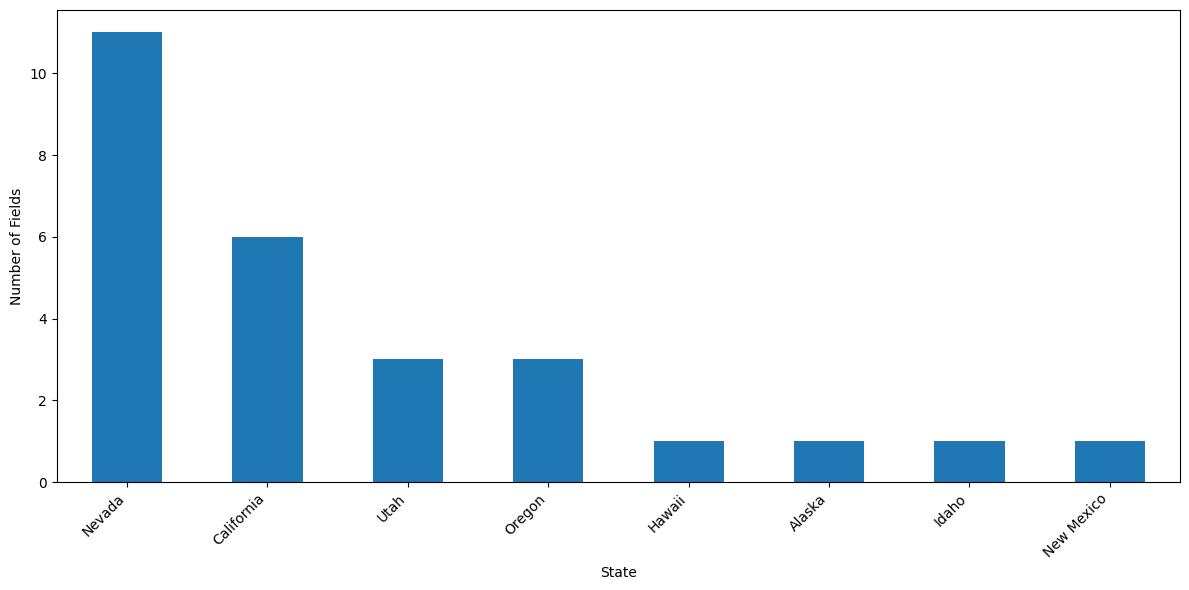

In [ ]:
# load data

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel("data.xlsx")
#df.head()

# prompt: field count by state

import matplotlib.pyplot as plt
state_counts = df['State'].value_counts()

# Create a bar plot
plt.figure(figsize=(12, 6))
state_counts.plot(kind='bar')
plt.xlabel("State")
plt.ylabel("Number of Fields")
#plt.title("Number of Fields per State")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


# Field count by state

# 34 reservoirs

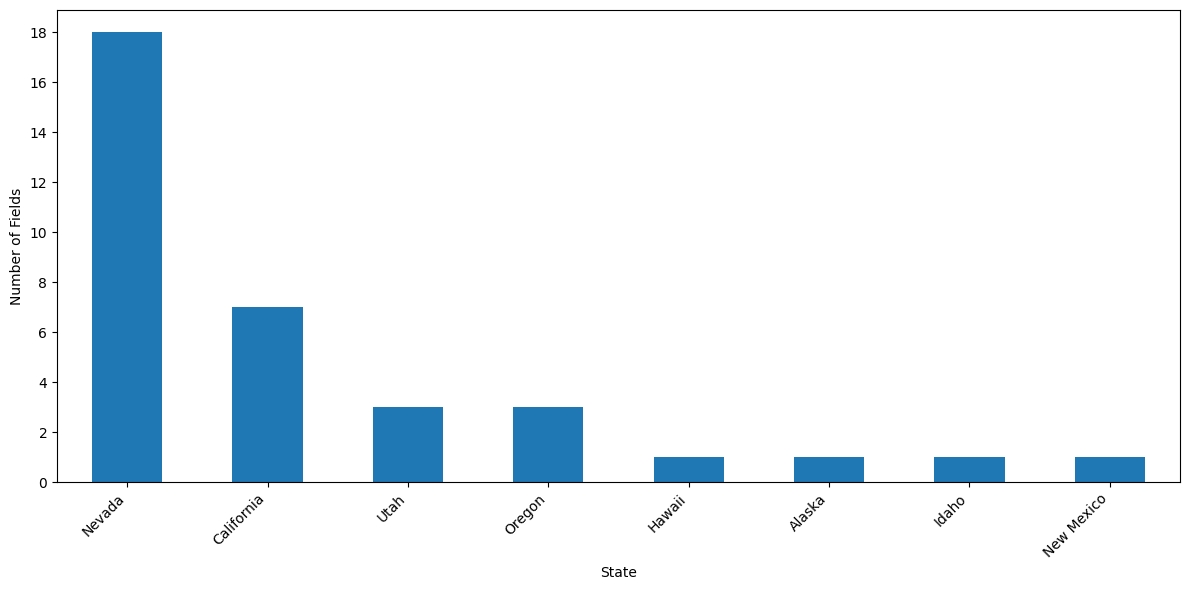

In [ ]:
# load data

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel("FullStateCount.xlsx")
#df.head()
# prompt: field count by state

import matplotlib.pyplot as plt
state_counts = df['State'].value_counts()

# Create a bar plot
plt.figure(figsize=(12, 6))
state_counts.plot(kind='bar')
plt.xlabel("State")
plt.ylabel("Number of Fields")
#plt.title("Number of Fields per State")
plt.yticks(range(0, int(plt.ylim()[1]) + 2, 2))
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


In [ ]:
#save all images generated in this worksheet to download of pc

import matplotlib.pyplot as plt
import os
from google.colab import files

# Create a directory to store the images
!mkdir images

# Iterate through the figures and save them as PNG files
for i in plt.get_fignums():
  plt.figure(i)
  plt.savefig(f"images/figure_{i}.png")

# Zip the images directory
!zip -r images.zip images

# Download the zip file
files.download('images.zip')


mkdir: cannot create directory ‘images’: File exists
updating: images/ (stored 0%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>